# CAR PRICE PREDICTION

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats

# LOADING AND VISUALISING THE DATASET

In [2]:
df = pd.read_csv('cars_price.csv')
df.head()

Unnamed: 0        make    model  priceUSD  year     condition  \
0           0       honda   accord       565  1993  with mileage   
1           1        ford   fusion      5550  2008  with mileage   
2           2      nissan    teana      8300  2008  with mileage   
3           3  volkswagen      fox      3300  2005  with mileage   
4           4      nissan  primera      2450  2002   with damage   

   mileage(kilometers) fuel_type  volume(cm3)     color transmission  \
0             960015.0    petrol       2000.0     black    mechanics   
1             172000.0    diesel       1400.0    silver    mechanics   
2             223000.0    petrol       2500.0    purple         auto   
3             140000.0    petrol       1200.0      blue    mechanics   
4             413000.0    diesel       2200.0  burgundy    mechanics   

          drive_unit segment  
0  front-wheel drive       D  
1  front-wheel drive       M  
2  front-wheel drive       D  
3  front-wheel drive       A  
4  front-wheel drive       D

In [3]:
df.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


# ANALYSING TARGET ATTRIBUTE

In [5]:
df['priceUSD'].describe()

count     40000.000000
mean       7430.383775
std        8338.242134
min          95.000000
25%        2350.000000
50%        5350.000000
75%        9850.000000
max      195000.000000
Name: priceUSD, dtype: float64

Skewness: 5.011810
Kurtosis: 53.877239


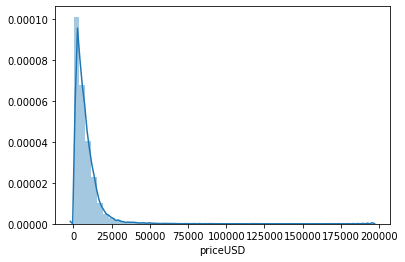

In [6]:
#skewness and kurtosis
sns.distplot(df['priceUSD'])

print("Skewness: %f" % df['priceUSD'].skew())
print("Kurtosis: %f" % df['priceUSD'].kurt())


Here we observe that distribution of prices shows a high positive skewness towards left skew > 1. 
A kurtosis value of 53.8 is extremely high,indicating high presence of outliers in the dataset.

# ANALYSING RELATIONSHIP WITH NUMERICAL FEATURES 

In [7]:
def scatter_plot(attrib):
    data = pd.concat([df['priceUSD'], df[attrib]], axis=1)
    data.plot.scatter(x=attrib, y='priceUSD', ylim=(0,195000))

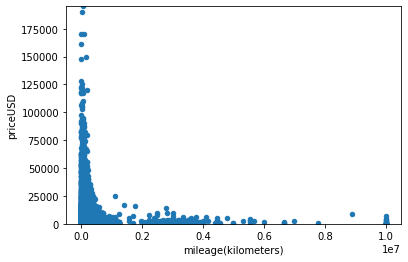

In [8]:
# mileage vs price
scatter_plot('mileage(kilometers)')

Here we observe that as the mileage increases the price decreases. Price and Mileage seem to be in an exponential relationship with negative
exponent. Trend is similar to exponential decay.

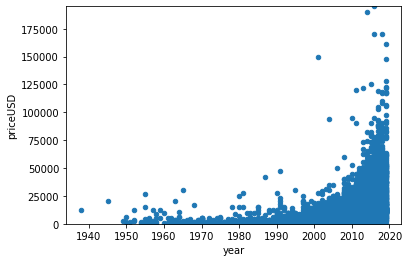

In [9]:
# year vs price
scatter_plot('year')

Here we observe that price increases in recent years.

# ANALYSING RELATIONSHIP WITH CATEGORICAL FEATURES

In [10]:
def box_plot(attrib):
    data = pd.concat([df['priceUSD'], df[attrib]], axis=1)
    f, ax = plt.subplots(figsize=(30, 12))
    fig = sns.boxplot(x=attrib, y="priceUSD", data=data)
    fig.axis(ymin=0, ymax=195000)

In [11]:
# Let us check how many unique car makers and models do we have in dataset
print("makers :",end="") 
print(len(df.make.unique()))
print("models :",end="") 
print(len(df.model.unique()))

makers :93
models :991


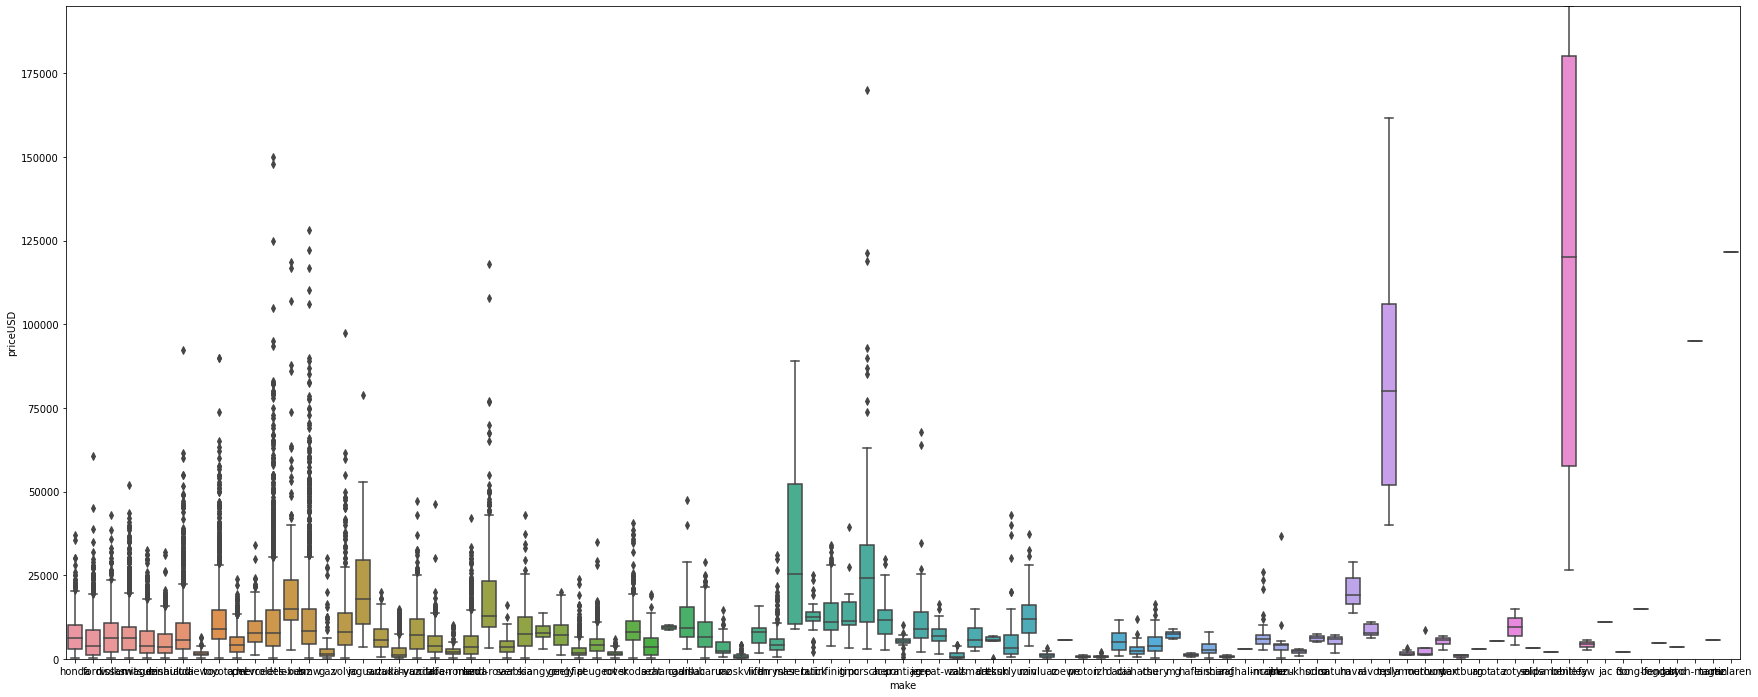

In [12]:
# car_maker vs price 
box_plot('make')

Here we observe there is a correlation between Price and Luxury car manufacturers. Also there is a prevalence of low to medium budget cars in the dataset.

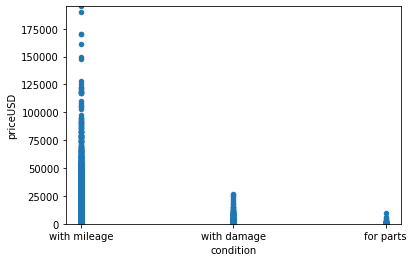

In [13]:
# condition vs price
scatter_plot('condition')

As expected the price falls if the condition of car is damaged.

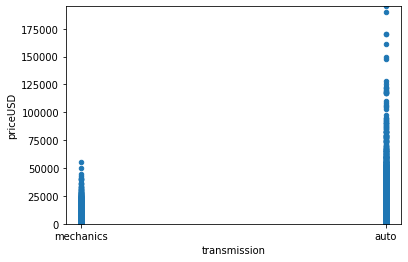

In [14]:
#transmission vs price
scatter_plot('transmission')

Automatic transmission indeed cost more than the manual ones.

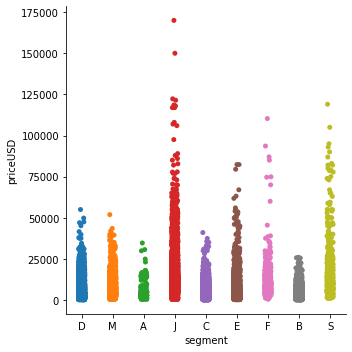

In [15]:
#segment vs price
sns.catplot(x="segment", y="priceUSD", data=df)

Here we can observe that segment J,S and E are comparitively costly but almost all other segments have prices uniformly distributed. Here also we can observe presence of some outliers.

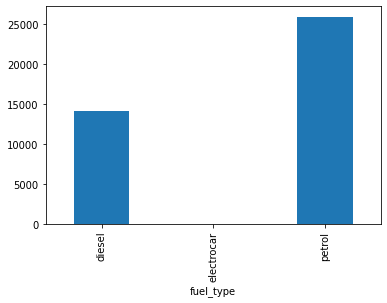

In [16]:
#fuel type distribution
import matplotlib.pyplot as plt
df.groupby('fuel_type')['Unnamed: 0'].nunique().plot(kind = "bar")
plt.show()


# DATA PREPROCESSING

In [17]:
# Let us deal with missing data values
df.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [18]:
fuel_group = df.groupby('fuel_type')
fuel_group.describe().head()

Unnamed: 0                                                         \
                count          mean           std     min       25%      50%   
fuel_type                                                                      
diesel        14101.0  19842.621020  11521.372655     1.0   9847.00  19946.0   
electrocar       30.0  15130.766667   9388.037923  1080.0   7803.25  15733.0   
petrol        25869.0  20090.659786  11561.684801     0.0  10106.00  20038.0   

                             priceUSD                ... mileage(kilometers)  \
                75%      max    count          mean  ...                 75%   
fuel_type                                            ...                       
diesel      29701.0  39999.0  14101.0   8546.210056  ...            350000.0   
electrocar  21357.5  38290.0     30.0  36884.733333  ...             69250.0   
petrol      30174.0  39998.0  25869.0   6787.997255  ...            294000.0   

                      volume(cm3)                                           \
                  max       count         mean          std    min     25%   
fuel_type                                                                    
diesel      9999999.0     14101.0  2156.161123   802.675840  500.0  1900.0   
electrocar   530000.0         0.0          NaN          NaN    NaN     NaN   
petrol      9999999.0     25869.0  2074.333875  1003.998244  500.0  1600.0   

                                     
               50%     75%      max  
fuel_type                            
diesel      2000.0  2400.0  20000.0  
electrocar     NaN     NaN      NaN  
petrol      1800.0  2300.0  20000.0  

[3 rows x 40 columns]

As we observe that count of cars with fuel type electrocar in the dataset is 30 and the volume count for the same is zero so all the missing values in volume column is due to electrocars.we know that volume of fuel consumption for a electrocar is zero so we can replace null values with zero.

# REMOVING OUTLIERS , CATEGORICAL ENCODING , DEALING WITH MISSING VALUES

To deal with categorical missing values we use Random Forest Classifier.
The data preprocessing and encoding part is mentioned in random_forest_regressor file.
The output is new dataframe with no missing values.

In [21]:
new_df= pd.read_csv('new.csv')
new_df.head()

Unnamed: 0  make  priceUSD  year  mileage(kilometers)  volume(cm3)  \
0           0    16       565    35             960015.0         2000   
1           1    12      5550    50             172000.0         1400   
2           2    33      8300    50             223000.0         2500   
3           3    48      3300    47             140000.0         1200   
4           4    33      2450    44             413000.0         2200   

   segment  fuel_type_electrocar  fuel_type_petrol  transmission_mechanics  \
0        3                     0                 1                       1   
1        7                     0                 0                       1   
2        3                     0                 1                       0   
3        0                     0                 1                       1   
4        3                     0                 0                       1   

   drive_unit_front-wheel drive  drive_unit_part-time four-wheel drive  \
0                             1                                      0   
1                             1                                      0   
2                             1                                      0   
3                             1                                      0   
4                             1                                      0   

   drive_unit_rear drive  condition_with damage  condition_with mileage  
0                      0                      0                       1  
1                      0                      0                       1  
2                      0                      0                       1  
3                      0                      0                       1  
4                      0                      1                       0

In [22]:
new_df.shape

(38097, 15)

In [23]:
new_df.isnull().sum()

Unnamed: 0                               0
make                                     0
priceUSD                                 0
year                                     0
mileage(kilometers)                      0
volume(cm3)                              0
segment                                  0
fuel_type_electrocar                     0
fuel_type_petrol                         0
transmission_mechanics                   0
drive_unit_front-wheel drive             0
drive_unit_part-time four-wheel drive    0
drive_unit_rear drive                    0
condition_with damage                    0
condition_with mileage                   0
dtype: int64

In [24]:
corr = new_df.corr()
corr

Unnamed: 0      make  priceUSD  \
Unnamed: 0                               1.000000  0.003321  0.006184   
make                                     0.003321  1.000000  0.005410   
priceUSD                                 0.006184  0.005410  1.000000   
year                                     0.002525  0.082970  0.669723   
mileage(kilometers)                     -0.006569 -0.017318 -0.174527   
volume(cm3)                              0.004443 -0.123932  0.232790   
segment                                  0.002999 -0.054515  0.317311   
fuel_type_electrocar                    -0.011950  0.035555  0.130729   
fuel_type_petrol                         0.010099 -0.060065 -0.109771   
transmission_mechanics                  -0.006304  0.116046 -0.467338   
drive_unit_front-wheel drive            -0.004166  0.198503 -0.301753   
drive_unit_part-time four-wheel drive    0.005356  0.037890  0.177010   
drive_unit_rear drive                    0.002649 -0.199139 -0.019840   
condition_with damage                   -0.005634 -0.002732 -0.055148   
condition_with mileage                   0.018368  0.004231  0.099115   

                                           year  mileage(kilometers)  \
Unnamed: 0                             0.002525            -0.006569   
make                                   0.082970            -0.017318   
priceUSD                               0.669723            -0.174527   
year                                   1.000000            -0.233171   
mileage(kilometers)                   -0.233171             1.000000   
volume(cm3)                            0.008466             0.024207   
segment                                0.102874             0.014413   
fuel_type_electrocar                   0.045272            -0.014405   
fuel_type_petrol                      -0.054001            -0.091908   
transmission_mechanics                -0.380739             0.097120   
drive_unit_front-wheel drive          -0.017300             0.014247   
drive_unit_part-time four-wheel drive  0.112059            -0.047683   
drive_unit_rear drive                 -0.200656             0.052288   
condition_with damage                 -0.037500             0.002577   
condition_with mileage                 0.109318            -0.031920   

                                       volume(cm3)   segment  \
Unnamed: 0                                0.004443  0.002999   
make                                     -0.123932 -0.054515   
priceUSD                                  0.232790  0.317311   
year                                      0.008466  0.102874   
mileage(kilometers)                       0.024207  0.014413   
volume(cm3)                               1.000000  0.361921   
segment                                   0.361921  1.000000   
fuel_type_electrocar                     -0.062505 -0.001047   
fuel_type_petrol                         -0.036081 -0.195951   
transmission_mechanics                   -0.340895 -0.242946   
drive_unit_front-wheel drive             -0.414391 -0.360209   
drive_unit_part-time four-wheel drive     0.158681  0.272061   
drive_unit_rear drive                     0.162481  0.041556   
condition_with damage                    -0.006671 -0.017980   
condition_with mileage                    0.021361  0.047083   

                                       fuel_type_electrocar  fuel_type_petrol  \
Unnamed: 0                                        -0.011950          0.010099   
make                                               0.035555         -0.060065   
priceUSD                                           0.130729         -0.109771   
year                                               0.045272         -0.054001   
mileage(kilometers)                               -0.014405         -0.091908   
volume(cm3)                                       -0.062505         -0.036081   
segment                                           -0.001047         -0.195951   
fuel_type_electrocar                        

Let us visualise the correlation matrix and drop the attributes with weak correlation with the target attribute.

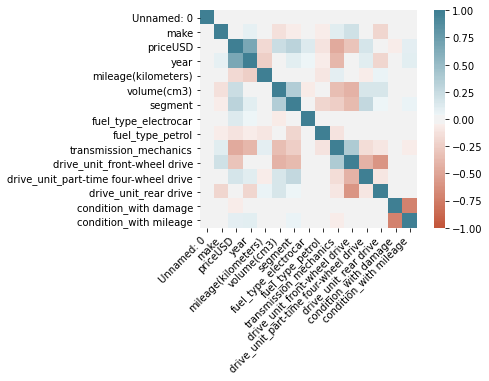

In [25]:
import seaborn as sns
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Here dark blue cells indicate strong positive correlation while dark red ones indicate strong negative correlation.

In [26]:
#drop weak correlations
new_df.drop('Unnamed: 0', inplace = True, axis = 1)
new_df.drop('make', inplace = True, axis = 1)
new_df.drop('condition_with damage', inplace = True, axis = 1)
new_df.drop('condition_with mileage', inplace = True, axis = 1)

In [27]:
new_df.head()

priceUSD  year  mileage(kilometers)  volume(cm3)  segment  \
0       565    35             960015.0         2000        3   
1      5550    50             172000.0         1400        7   
2      8300    50             223000.0         2500        3   
3      3300    47             140000.0         1200        0   
4      2450    44             413000.0         2200        3   

   fuel_type_electrocar  fuel_type_petrol  transmission_mechanics  \
0                     0                 1                       1   
1                     0                 0                       1   
2                     0                 1                       0   
3                     0                 1                       1   
4                     0                 0                       1   

   drive_unit_front-wheel drive  drive_unit_part-time four-wheel drive  \
0                             1                                      0   
1                             1                                      0   
2                             1                                      0   
3                             1                                      0   
4                             1                                      0   

   drive_unit_rear drive  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0